# MANIPUR

In [384]:
import pandas as pd

# 1. Load the three Manipur datasets
df_mn_enrolment = pd.read_csv('/content/Manipur Enrolment Dataset.csv')
df_mn_demographic = pd.read_csv('/content/Manipur Demographic Dataset.csv')
df_mn_biometric = pd.read_csv('/content/Manipur Biometric Dataset.csv')

In [385]:
# 2. Convert the 'date' column in each of these three DataFrames to datetime objects
df_mn_enrolment['date'] = pd.to_datetime(df_mn_enrolment['date'], format='%d-%m-%Y')
df_mn_demographic['date'] = pd.to_datetime(df_mn_demographic['date'], format='%d-%m-%Y')
df_mn_biometric['date'] = pd.to_datetime(df_mn_biometric['date'], format='%d-%m-%Y')

print("Manipur datasets loaded and date columns converted successfully.")

Manipur datasets loaded and date columns converted successfully.


In [386]:
merged_mn_df_temp = pd.merge(df_mn_enrolment, df_mn_demographic, on=['date', 'state', 'district', 'pincode'], how='outer')
df_mn_merged = pd.merge(merged_mn_df_temp, df_mn_biometric, on=['date', 'state', 'district', 'pincode'], how='outer')

# Identify numerical columns for NaN filling
numeric_cols = df_mn_merged.select_dtypes(include=['number']).columns

# Replace NaN values in numerical columns with 0
df_mn_merged[numeric_cols] = df_mn_merged[numeric_cols].fillna(0)

print("\nMerged Manipur DataFrame (df_mn_merged) head:")
print(df_mn_merged.head())
print("\nMerged Manipur DataFrame (df_mn_merged) info:")
print(df_mn_merged.info())
print("\nMerged Manipur DataFrame (df_mn_merged) describe:")
print(df_mn_merged.describe())


Merged Manipur DataFrame (df_mn_merged) head:
        date    state   district  pincode  age_0_5  age_5_17  age_18_greater  \
0 2025-03-01  Manipur  Bishnupur   795126      0.0       0.0             0.0   
1 2025-03-01  Manipur  Bishnupur   795133      0.0       0.0             0.0   
2 2025-03-01  Manipur  Bishnupur   795134      0.0       0.0             0.0   
3 2025-03-01  Manipur  Bishnupur   795134      0.0       0.0             0.0   
4 2025-03-01  Manipur    Chandel   795101      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0          118.0         583.0           0.0          0.0  
1          256.0        1456.0         270.0        312.0  
2           79.0        1054.0         116.0        202.0  
3           79.0        1054.0         116.0        202.0  
4            0.0           0.0          21.0         31.0  

Merged Manipur DataFrame (df_mn_merged) info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21922 entries, 

In [387]:
import numpy as np

df_mn = df_mn_merged[df_mn_merged['state'] == 'Manipur'].copy()
df_mn['year'] = df_mn['date'].dt.year
df_mn['month'] = df_mn['date'].dt.month

age_columns = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

df_mn_agg = df_mn.groupby(['year', 'month', 'state', 'district'])[age_columns].sum().reset_index()

# 1. Create 'totalenrolments' column
df_mn_agg['totalenrolments'] = df_mn_agg['age_0_5'] + df_mn_agg['age_5_17'] + df_mn_agg['age_18_greater']

# 2. Create 'childenrolments' column
df_mn_agg['childenrolments'] = df_mn_agg['age_0_5'] + df_mn_agg['age_5_17']

# 3. Create 'totaldemoupdates' column
df_mn_agg['totaldemoupdates'] = df_mn_agg['demo_age_5_17'] + df_mn_agg['demo_age_17_']

# 4. Create 'totalbioupdates' column
df_mn_agg['totalbioupdates'] = df_mn_agg['bio_age_5_17'] + df_mn_agg['bio_age_17_']

# 5. Calculate 'CES' (Child Enrolment Score) with division by zero handling
df_mn_agg['CES'] = np.where(
    df_mn_agg['totalenrolments'] == 0,
    0,
    df_mn_agg['childenrolments'] / df_mn_agg['totalenrolments']
)

# 6. Calculate 'DUR' (Demographic Update Rate) with division by zero handling
df_mn_agg['DUR'] = np.where(
    df_mn_agg['totalenrolments'] == 0,
    0,
    df_mn_agg['totaldemoupdates'] / df_mn_agg['totalenrolments']
)

# 7. Calculate 'BUR' (Biometric Update Rate) with division by zero handling
df_mn_agg['BUR'] = np.where(
    df_mn_agg['totalenrolments'] == 0,
    0,
    df_mn_agg['totalbioupdates'] / df_mn_agg['totalenrolments']
)

print("Shape of df_mn:", df_mn.shape)
print("\nFirst 5 rows of df_mn with new 'year' and 'month' columns:")
print(df_mn.head())
print("\nAggregated DataFrame (df_mn_agg) head:")
print(df_mn_agg.head())
print("\nAggregated DataFrame (df_mn_agg) info:")
print(df_mn_agg.info())

Shape of df_mn: (21922, 13)

First 5 rows of df_mn with new 'year' and 'month' columns:
        date    state   district  pincode  age_0_5  age_5_17  age_18_greater  \
0 2025-03-01  Manipur  Bishnupur   795126      0.0       0.0             0.0   
1 2025-03-01  Manipur  Bishnupur   795133      0.0       0.0             0.0   
2 2025-03-01  Manipur  Bishnupur   795134      0.0       0.0             0.0   
3 2025-03-01  Manipur  Bishnupur   795134      0.0       0.0             0.0   
4 2025-03-01  Manipur    Chandel   795101      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  year  month  
0          118.0         583.0           0.0          0.0  2025      3  
1          256.0        1456.0         270.0        312.0  2025      3  
2           79.0        1054.0         116.0        202.0  2025      3  
3           79.0        1054.0         116.0        202.0  2025      3  
4            0.0           0.0          21.0         31.0  2025   

In [388]:
def min_max_normalize(series):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return 0  # Handle division by zero case
    return (series - min_val) / (max_val - min_val)

# Apply min-max normalization to 'totalenrolments', grouped by 'year' and 'state'
df_mn_agg['Enorm'] = df_mn_agg.groupby(['year', 'state'])['totalenrolments'].transform(min_max_normalize)

# Apply min-max normalization to 'totaldemoupdates', grouped by 'year' and 'state'
df_mn_agg['Dnorm'] = df_mn_agg.groupby(['year', 'state'])['totaldemoupdates'].transform(min_max_normalize)

# Apply min-max normalization to 'totalbioupdates', grouped by 'year', and 'state'
df_mn_agg['Bnorm'] = df_mn_agg.groupby(['year', 'state'])['totalbioupdates'].transform(min_max_normalize)

# Calculate 'stdnorm' by combining the normalized metrics
df_mn_agg['stdnorm'] = (df_mn_agg['Enorm'] + df_mn_agg['Dnorm'] + df_mn_agg['Bnorm']) / 3

# Compute 'ALBI' (Aadhaar Lifecycle Balance Index) as 1 - stdnorm
df_mn_agg['ALBI'] = 1 - df_mn_agg['stdnorm']

# Clip the values in the 'ALBI' column to ensure they are between 0 and 1
df_mn_agg['ALBI'] = df_mn_agg['ALBI'].clip(lower=0, upper=1)

In [389]:
# Calculate risk components
df_mn_agg['Enormrisk'] = 1 - df_mn_agg['Enorm']
df_mn_agg['CESrisknorm'] = 1 - df_mn_agg['CES']
df_mn_agg['DURrisknorm'] = 1 - df_mn_agg['DUR']
df_mn_agg['BURrisknorm'] = 1 - df_mn_agg['BUR']
df_mn_agg['ALBIrisknorm'] = 1 - df_mn_agg['ALBI']

# Calculate the 'riskscore' by summing the risk components, averaging, and scaling to 0-100
df_mn_agg['riskscore'] = (
    df_mn_agg['Enormrisk'] +
    df_mn_agg['CESrisknorm'] +
    df_mn_agg['DURrisknorm'] +
    df_mn_agg['BURrisknorm'] +
    df_mn_agg['ALBIrisknorm']
) / 5 * 100

# Display the head of the DataFrame to show the newly created columns
print("Aggregated DataFrame (df_mn_agg) with normalized metrics, ALBI, and riskscore head:")
print(df_mn_agg.head())

Aggregated DataFrame (df_mn_agg) with normalized metrics, ALBI, and riskscore head:
   year  month    state       district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Manipur      Bishnupur      0.0       0.0             0.0   
1  2025      3  Manipur        Chandel      0.0       0.0             0.0   
2  2025      3  Manipur  Churachandpur      0.0       0.0             0.0   
3  2025      3  Manipur    Imphal East      0.0       0.0             0.0   
4  2025      3  Manipur    Imphal West      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Dnorm     Bnorm  \
0          532.0        4147.0         502.0  ...  0.090429  0.058222   
1          182.0         927.0         180.0  ...  0.021433  0.035134   
2          974.0        3426.0        1138.0  ...  0.085037  0.115105   
3          557.0        4225.0         513.0  ...  0.092420  0.064054   
4          805.0        5906.0         774.0  ...  0.129701  0.089436   

    stdnorm   

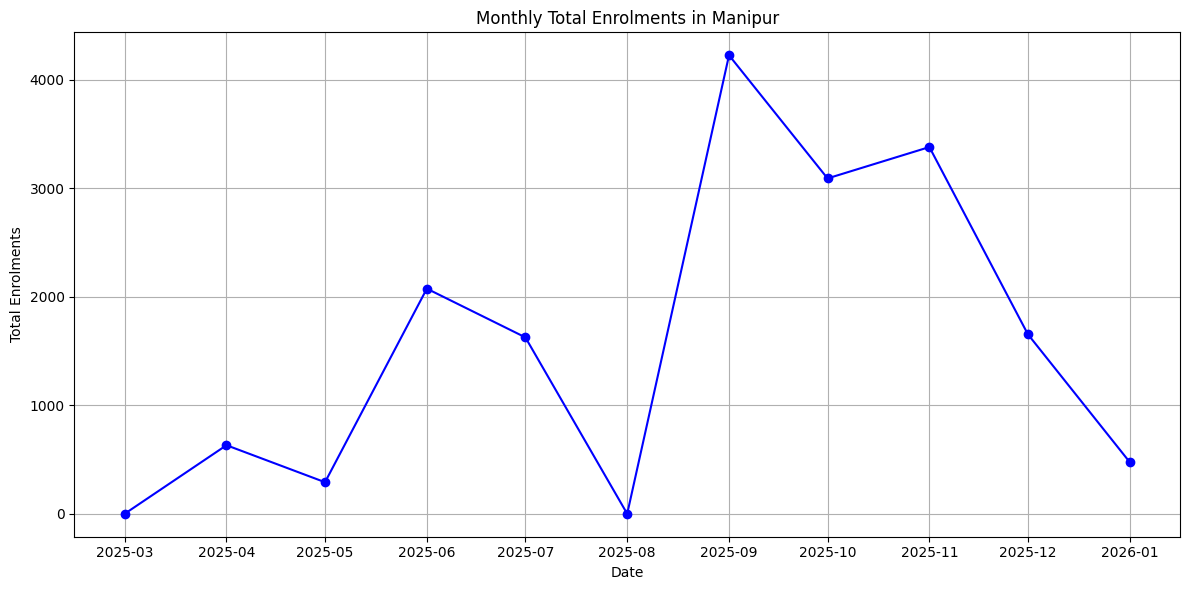

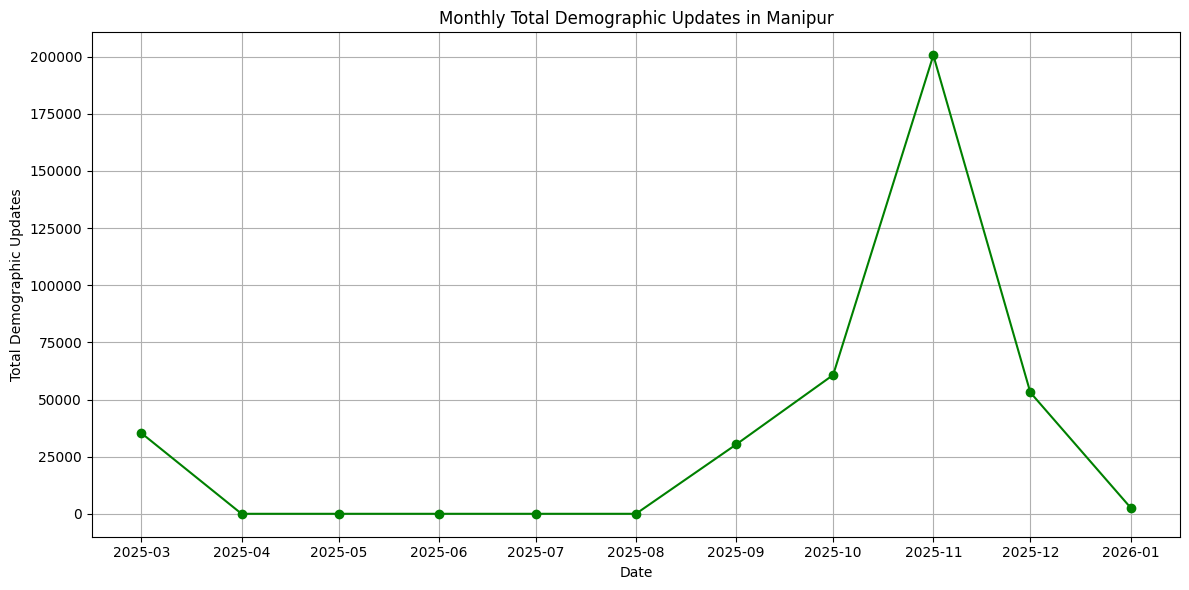

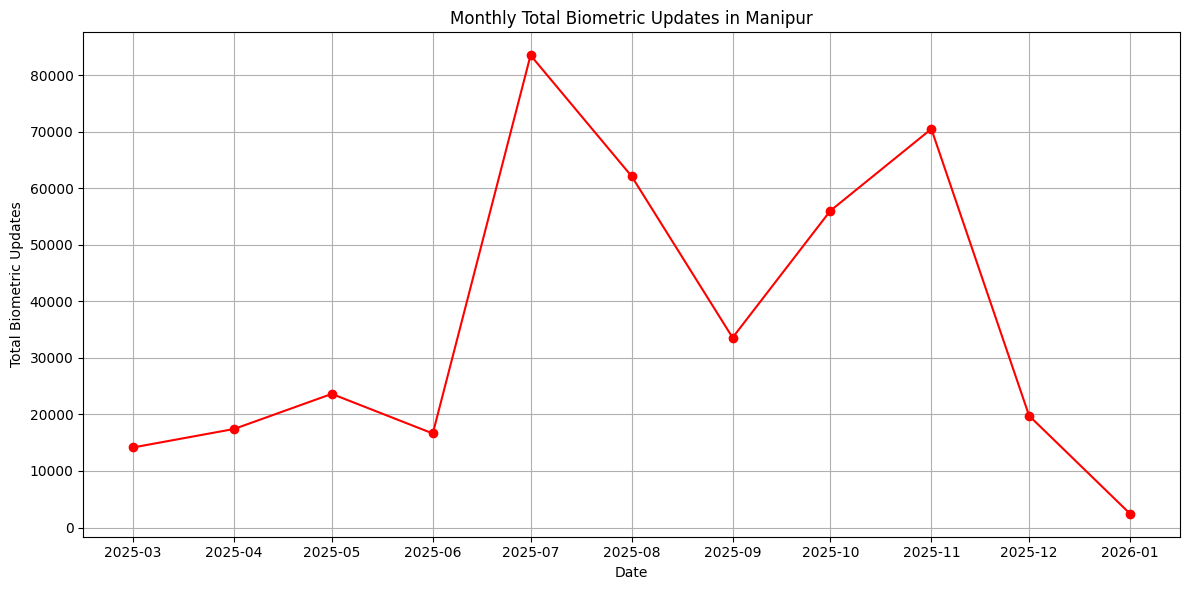

Monthly trend plots generated successfully.


In [390]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a monthly trends DataFrame
df_monthly_trends = df_mn_agg.groupby(['year', 'month']).agg({
    'totalenrolments': 'sum',
    'totaldemoupdates': 'sum',
    'totalbioupdates': 'sum'
}).reset_index()

# Create a date column for plotting
df_monthly_trends['date'] = pd.to_datetime(df_monthly_trends['year'].astype(str) + '-' + df_monthly_trends['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_monthly_trends = df_monthly_trends.sort_values(by='date')

# Plotting totalenrolments monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_trends['date'], df_monthly_trends['totalenrolments'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.title('Monthly Total Enrolments in Manipur')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totaldemoupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_trends['date'], df_monthly_trends['totaldemoupdates'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Total Demographic Updates')
plt.title('Monthly Total Demographic Updates in Manipur')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totalbioupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_trends['date'], df_monthly_trends['totalbioupdates'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.title('Monthly Total Biometric Updates in Manipur')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly trend plots generated successfully.")


**Univariate Analysis**

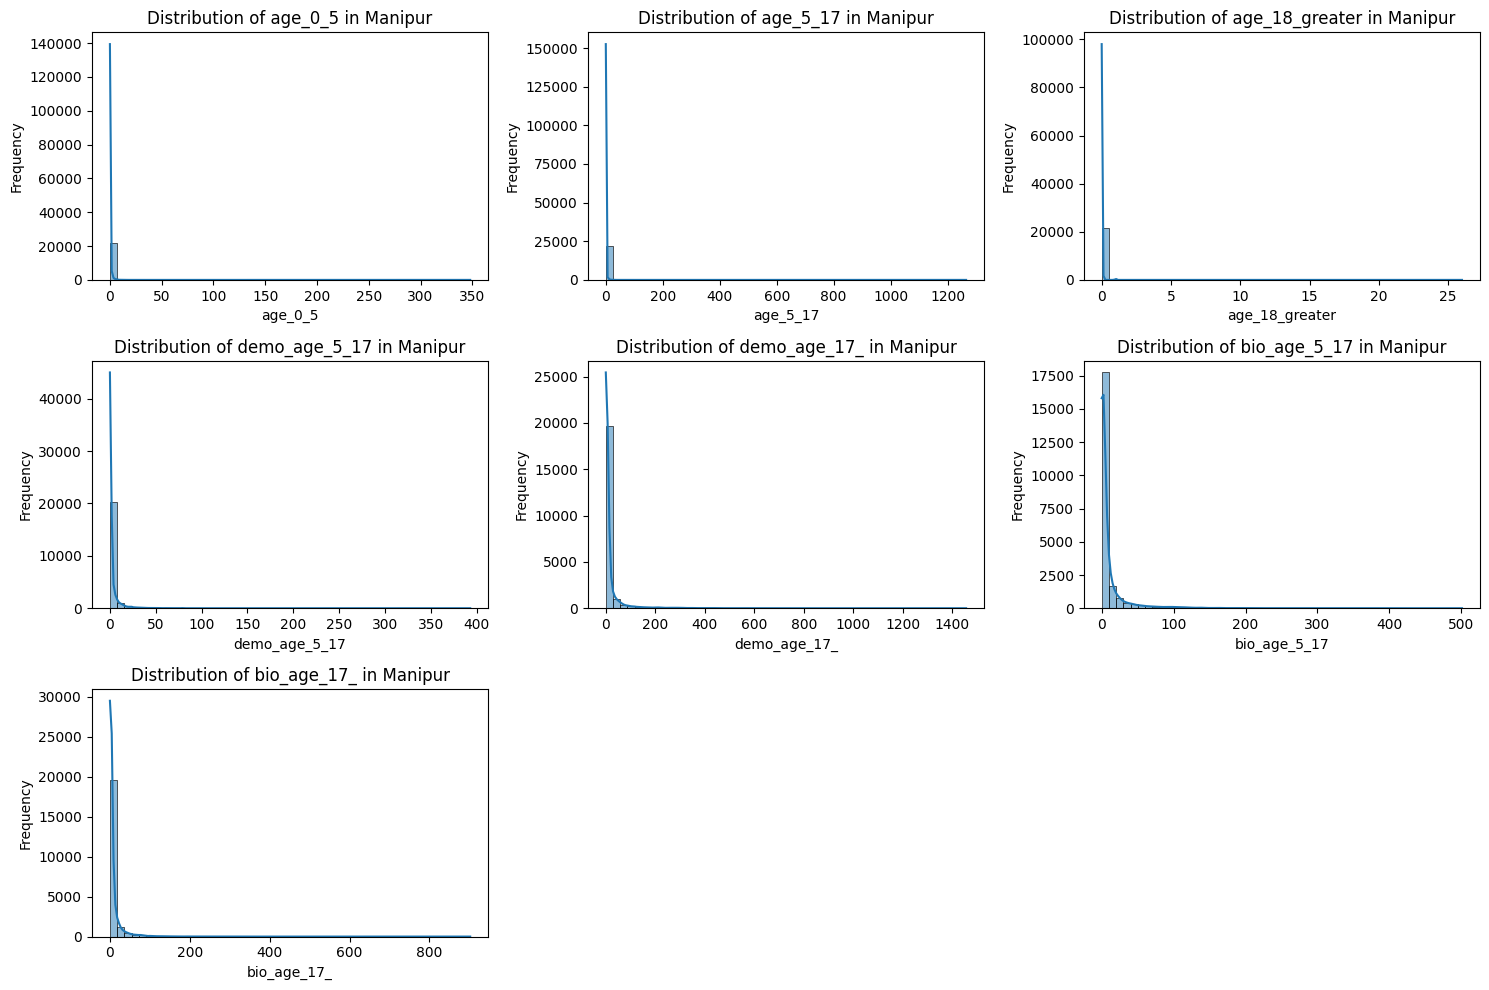

In [391]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid based on number of columns
    sns.histplot(df_mn_merged[col], bins=50, kde=True)
    plt.title(f'Distribution of {col} in Manipur')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

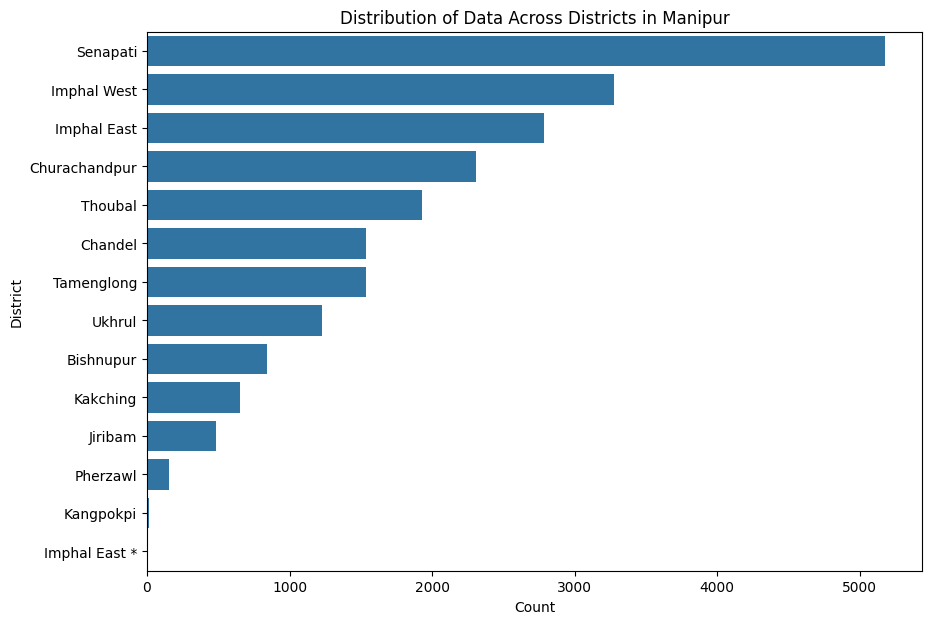

Histograms for numerical age-related columns and count plot for 'district' displayed for Manipur.


In [392]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df_mn_merged, y='district', order=df_mn_merged['district'].value_counts().index)
plt.title('Distribution of Data Across Districts in Manipur')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

print("Histograms for numerical age-related columns and count plot for 'district' displayed for Manipur.")

**Bivariate and Trivariate Analysis**

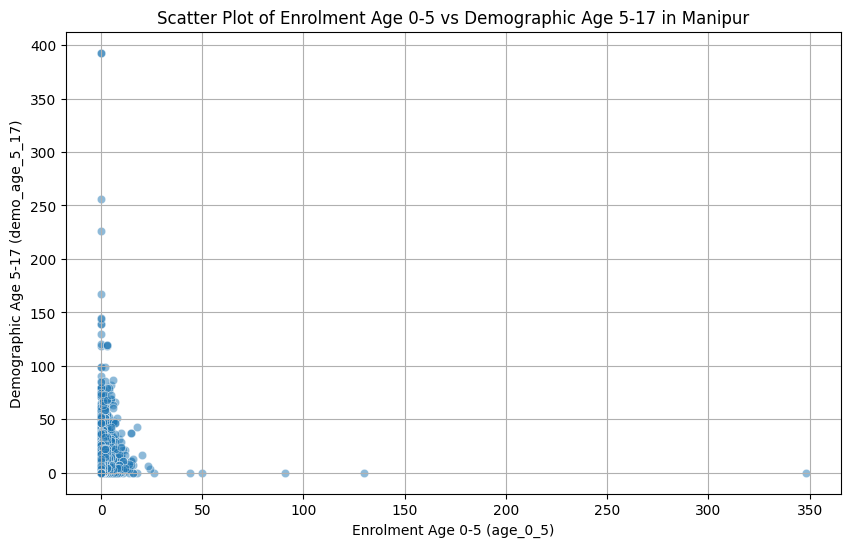

Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Manipur.


In [393]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_mn_merged, x='age_0_5', y='demo_age_5_17', alpha=0.5)
plt.title('Scatter Plot of Enrolment Age 0-5 vs Demographic Age 5-17 in Manipur')
plt.xlabel('Enrolment Age 0-5 (age_0_5)')
plt.ylabel('Demographic Age 5-17 (demo_age_5_17)')
plt.grid(True)
plt.show()

print("Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Manipur.")

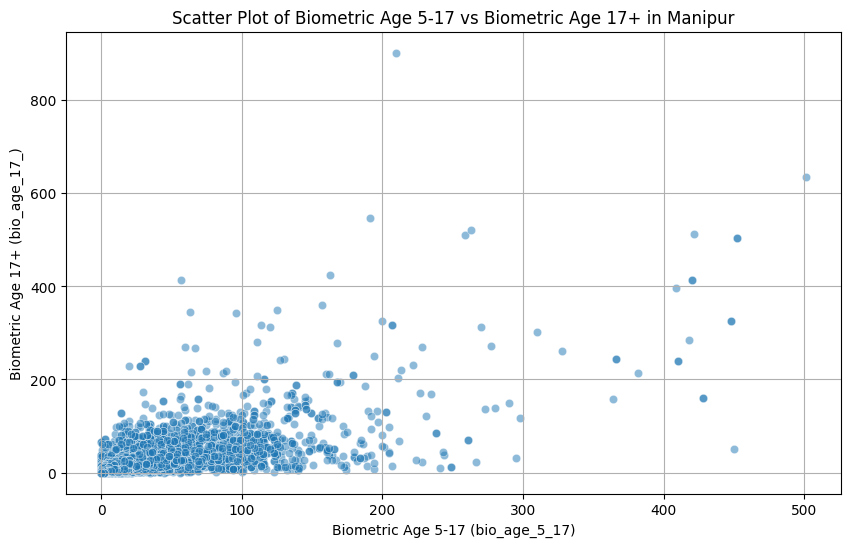

Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Manipur.


In [394]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_mn_merged, x='bio_age_5_17', y='bio_age_17_', alpha=0.5)
plt.title('Scatter Plot of Biometric Age 5-17 vs Biometric Age 17+ in Manipur')
plt.xlabel('Biometric Age 5-17 (bio_age_5_17)')
plt.ylabel('Biometric Age 17+ (bio_age_17_)')
plt.grid(True)
plt.show()

print("Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Manipur.")

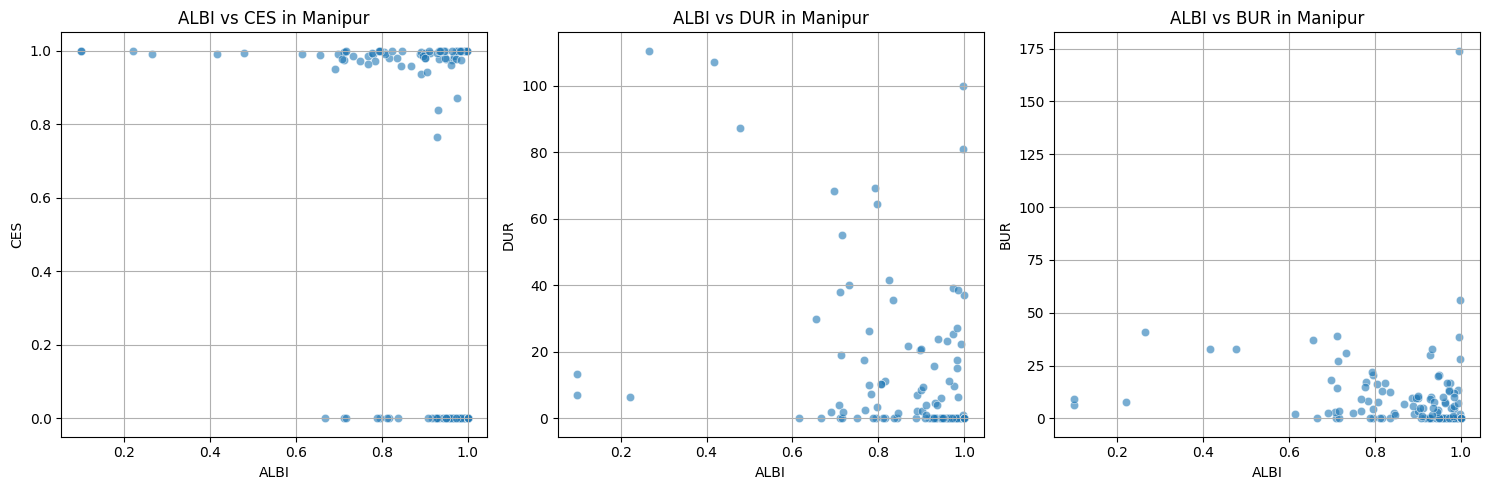

Bivariate analysis scatter plots for ALBI vs CES, DUR, and BUR displayed for Manipur.


In [395]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics_for_albi_scatter = ['CES', 'DUR', 'BUR']

plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics_for_albi_scatter):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df_mn_agg, x='ALBI', y=metric, alpha=0.6)
    plt.title(f'ALBI vs {metric} in Manipur')
    plt.xlabel('ALBI')
    plt.ylabel(metric)
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Bivariate analysis scatter plots for ALBI vs CES, DUR, and BUR displayed for Manipur.")

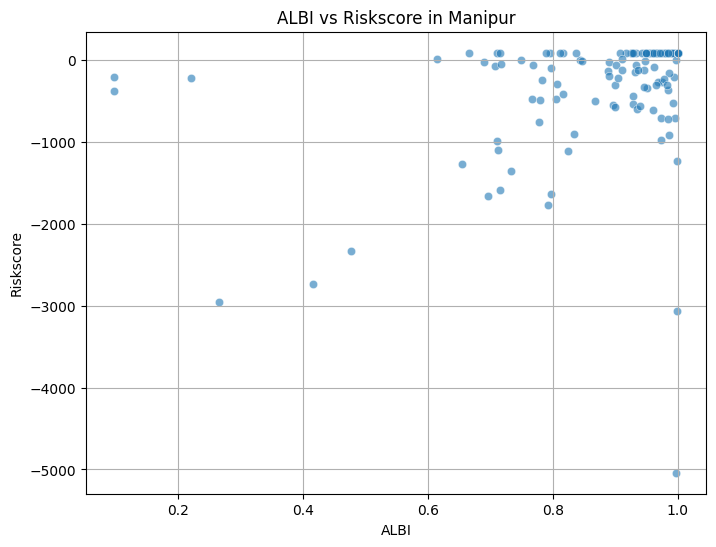

Scatter plot for ALBI vs Riskscore displayed for Manipur.


In [396]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_mn_agg, x='ALBI', y='riskscore', alpha=0.6)
plt.title('ALBI vs Riskscore in Manipur')
plt.xlabel('ALBI')
plt.ylabel('Riskscore')
plt.grid(True)
plt.show()

print("Scatter plot for ALBI vs Riskscore displayed for Manipur.")

In [397]:
numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
correlation_matrix_mn = df_mn_merged[numerical_age_cols].corr()

print("Correlation Matrix for Manipur:")
print(correlation_matrix_mn)

Correlation Matrix for Manipur:
                 age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
age_0_5         1.000000  0.940113        0.562295       0.074427   
age_5_17        0.940113  1.000000        0.522145       0.022252   
age_18_greater  0.562295  0.522145        1.000000       0.027981   
demo_age_5_17   0.074427  0.022252        0.027981       1.000000   
demo_age_17_    0.077379  0.023918        0.017771       0.870623   
bio_age_5_17    0.101364  0.061941        0.128037       0.355638   
bio_age_17_     0.094731  0.073164        0.132320       0.365873   

                demo_age_17_  bio_age_5_17  bio_age_17_  
age_0_5             0.077379      0.101364     0.094731  
age_5_17            0.023918      0.061941     0.073164  
age_18_greater      0.017771      0.128037     0.132320  
demo_age_5_17       0.870623      0.355638     0.365873  
demo_age_17_        1.000000      0.359990     0.364470  
bio_age_5_17        0.359990      1.000000     0.732080  
bio_age_1

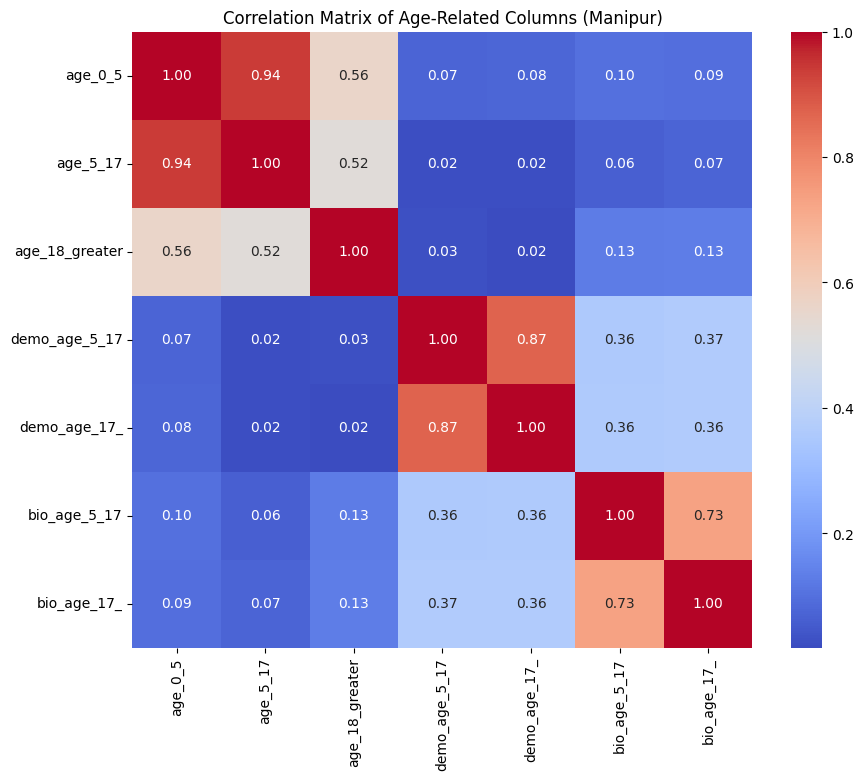

Correlation matrix heatmap for age-related columns displayed for Manipur.


In [398]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_mn, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Age-Related Columns (Manipur)')
plt.show()

print("Correlation matrix heatmap for age-related columns displayed for Manipur.")

In [399]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the age-related columns for grouping and sum
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

# Group by district and calculate the mean of age-related columns
df_mn_district_mean = df_mn_merged.groupby('district')[age_cols_to_group].mean().reset_index()

# Calculate total_avg_age for each district
df_mn_district_mean['total_avg_age'] = df_mn_district_mean[age_cols_to_group].sum(axis=1)

# Get the top 10 districts based on 'total_avg_age'
num_districts_mn = df_mn_district_mean['district'].nunique()
top_n = min(10, num_districts_mn)
df_mn_district_mean_topn = df_mn_district_mean.nlargest(top_n, 'total_avg_age')

print(f"Top {top_n} districts by total average age-related counts for Manipur:")
print(df_mn_district_mean_topn[['district', 'total_avg_age']])

# Melt the DataFrame for grouped bar chart plotting
df_mn_district_mean_melted = df_mn_district_mean_topn.melt(
    id_vars=['district'],
    value_vars=age_cols_to_group,
    var_name='Age Group',
    value_name='Average Count'
)

Top 10 districts by total average age-related counts for Manipur:
         district  total_avg_age
0       Bishnupur     118.016647
12        Thoubal      79.754668
3     Imphal East      57.418671
5     Imphal West      50.324679
13         Ukhrul      29.032600
2   Churachandpur      24.472451
11     Tamenglong      15.814984
1         Chandel      14.269181
7        Kakching      13.812883
10       Senapati      13.226043


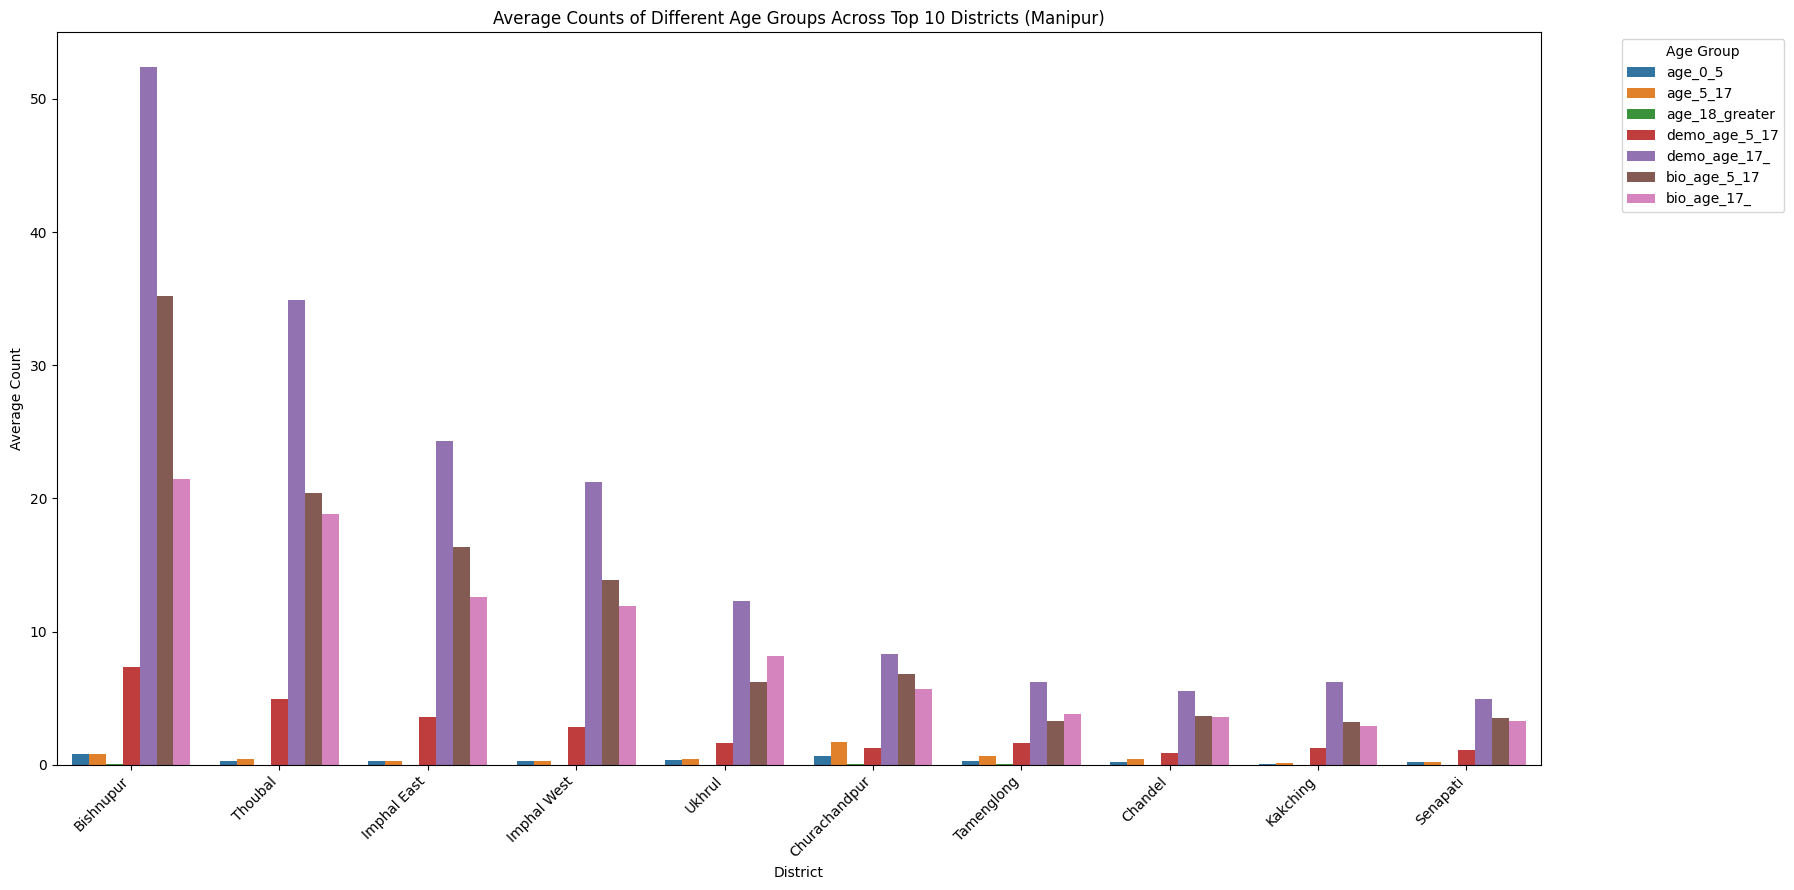

Insight: The grouped bar chart visually represents the distribution of average enrolment, demographic, and biometric counts across the top districts in Manipur, providing insights into their overall activity and the relative contribution of each age group.


In [400]:
# Create the grouped bar chart
plt.figure(figsize=(18, 9))
sns.barplot(data=df_mn_district_mean_melted, x='district', y='Average Count', hue='Age Group', palette='tab10')
plt.title(f'Average Counts of Different Age Groups Across Top {top_n} Districts (Manipur)')
plt.xlabel('District')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Insight: The grouped bar chart visually represents the distribution of average enrolment, demographic, and biometric counts across the top districts in Manipur, providing insights into their overall activity and the relative contribution of each age group.")

Time-series aggregated data (sum of age-related columns per date) for Manipur:
   year  month  age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
0  2025      3      0.0       0.0             0.0         4955.0   
1  2025      4    130.0     476.0            26.0            0.0   
2  2025      5    120.0     116.0            55.0            0.0   
3  2025      6    387.0    1638.0            50.0            0.0   
4  2025      7    348.0    1265.0            13.0            0.0   

   demo_age_17_  bio_age_5_17  bio_age_17_       date  
0       30351.0        5461.0       8697.0 2025-03-01  
1           0.0        8294.0       9130.0 2025-04-01  
2           0.0       11214.0      12415.0 2025-05-01  
3           0.0        6024.0      10608.0 2025-06-01  
4           0.0       47207.0      36305.0 2025-07-01  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          

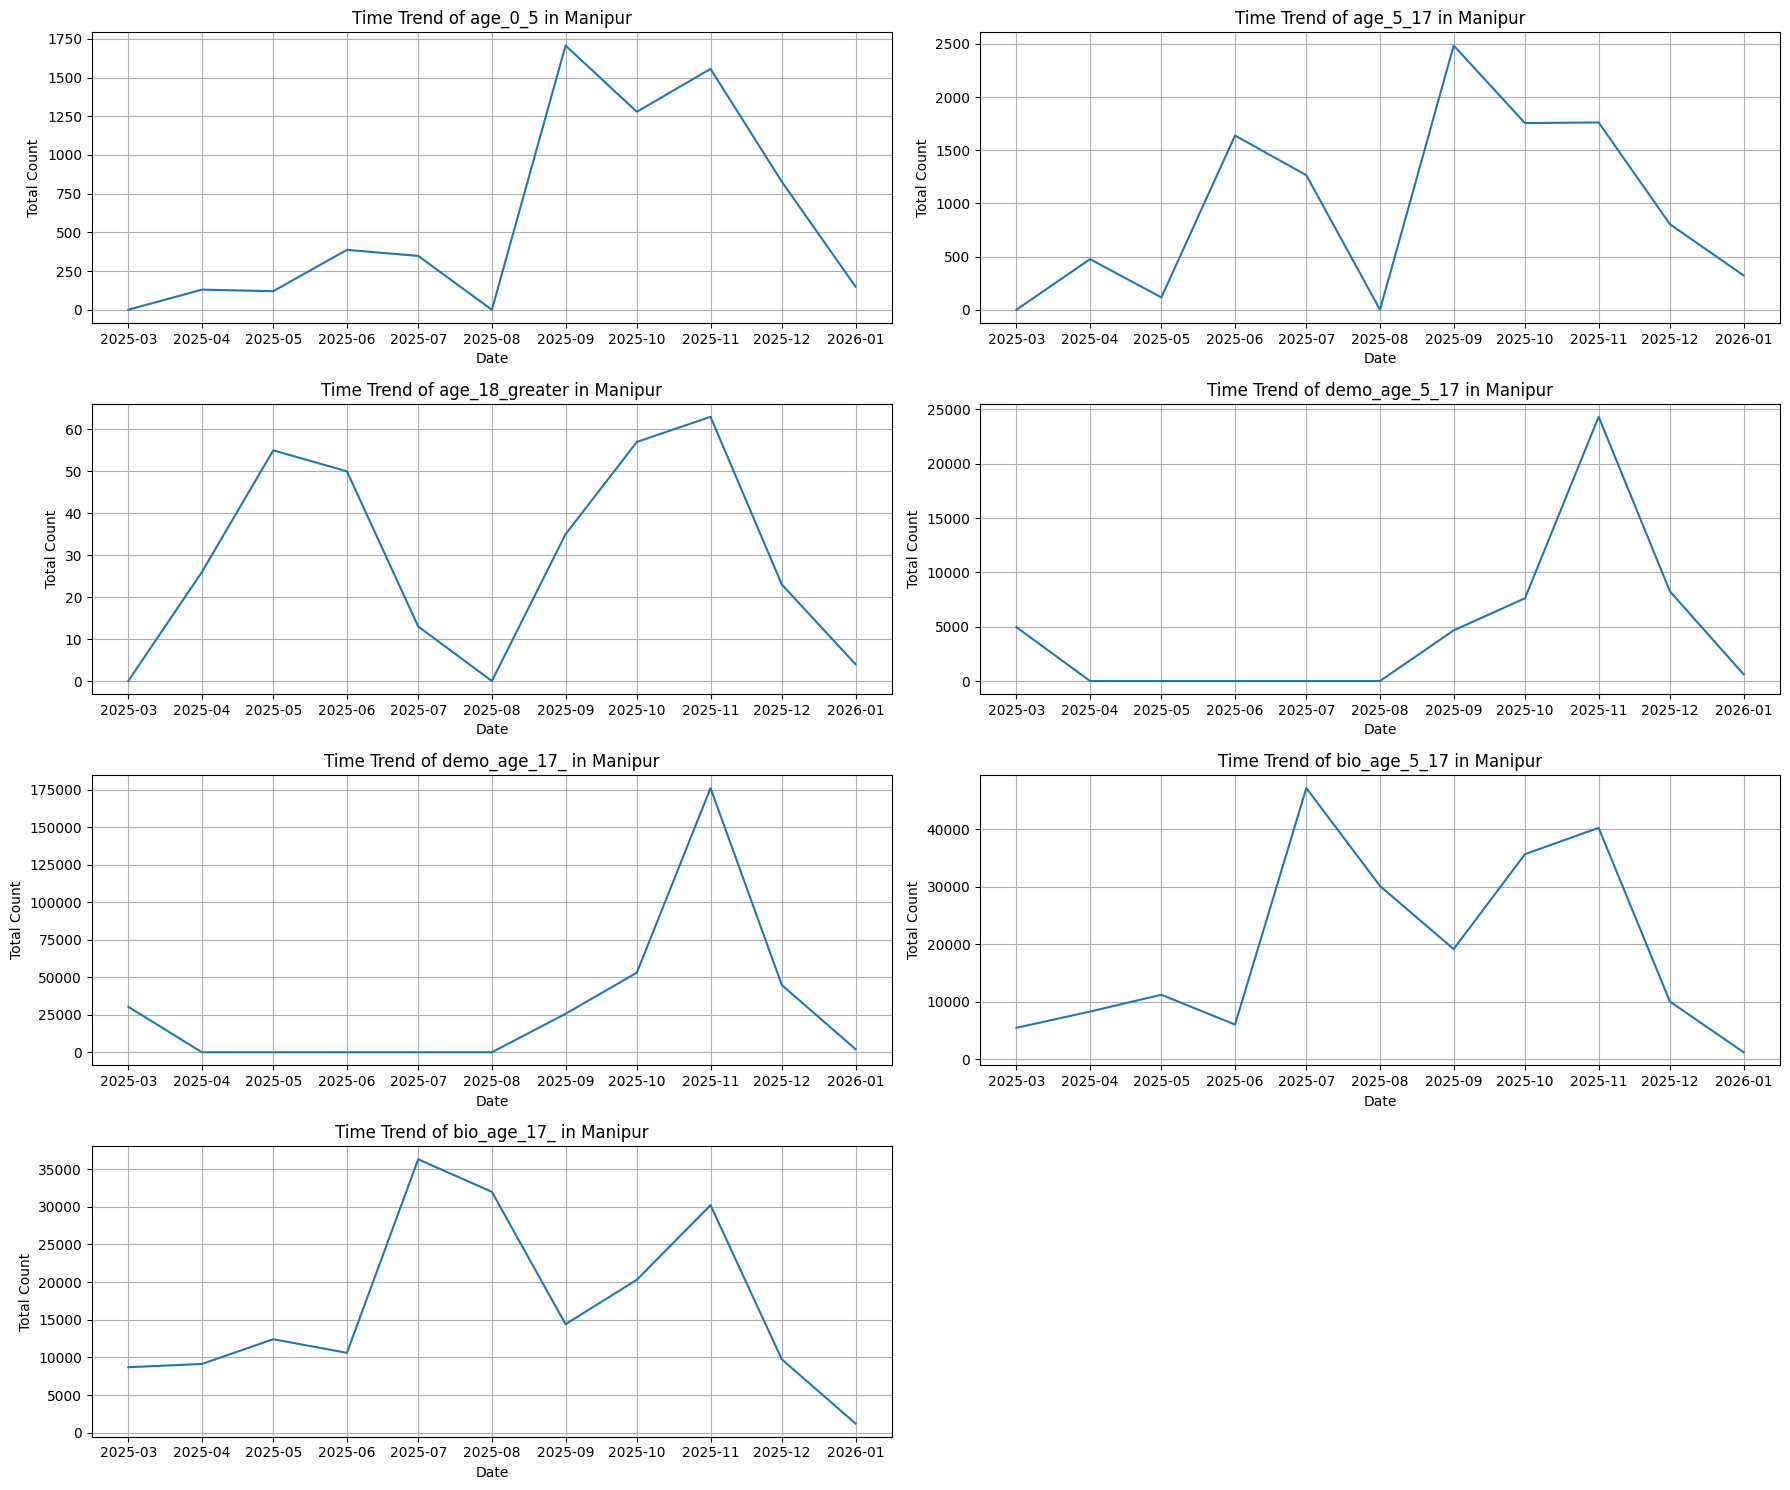

Insight: Line charts for each age-related column over time in Manipur provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.


In [401]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the age-related columns for time trend analysis
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

# Group df_mn_agg by year and month and sum the age-related columns
df_mn_time_trend = df_mn_agg.groupby(['year', 'month'])[age_cols_to_group].sum().reset_index()

# Create a proper date column for plotting
df_mn_time_trend['date'] = pd.to_datetime(df_mn_time_trend['year'].astype(str) + '-' + df_mn_time_trend['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_mn_time_trend = df_mn_time_trend.sort_values(by='date')

print("Time-series aggregated data (sum of age-related columns per date) for Manipur:")
print(df_mn_time_trend.head())
print(df_mn_time_trend.info())

plt.figure(figsize=(18, 15))
for i, col in enumerate(age_cols_to_group):
    plt.subplot(4, 2, i + 1) # Adjust subplot grid based on number of columns
    sns.lineplot(data=df_mn_time_trend, x='date', y=col)
    plt.title(f'Time Trend of {col} in Manipur')
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Insight: Line charts for each age-related column over time in Manipur provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.")

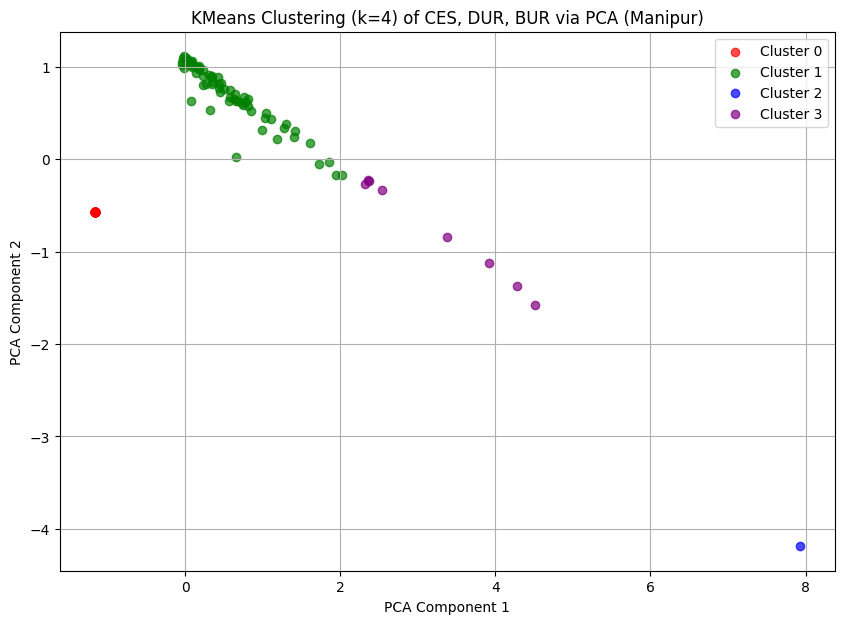

First 5 rows of df_mn_agg with 'clusterlabel' column:
   year  month    state       district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Manipur      Bishnupur      0.0       0.0             0.0   
1  2025      3  Manipur        Chandel      0.0       0.0             0.0   
2  2025      3  Manipur  Churachandpur      0.0       0.0             0.0   
3  2025      3  Manipur    Imphal East      0.0       0.0             0.0   
4  2025      3  Manipur    Imphal West      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Bnorm   stdnorm  \
0          532.0        4147.0         502.0  ...  0.058222  0.049550   
1          182.0         927.0         180.0  ...  0.035134  0.018856   
2          974.0        3426.0        1138.0  ...  0.115105  0.066714   
3          557.0        4225.0         513.0  ...  0.064054  0.052158   
4          805.0        5906.0         774.0  ...  0.089436  0.073046   

       ALBI  Enormrisk  CESrisknorm  DURrisk

In [402]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 1. Select the columns for clustering
features_for_clustering = df_mn_agg[['CES', 'DUR', 'BUR']]

# 2. Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# 3. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(scaled_features)

# 4. Add the cluster labels to df_mn_agg
df_mn_agg['clusterlabel'] = kmeans.labels_

# 5. Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA components for easier plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['clusterlabel'] = df_mn_agg['clusterlabel']

# 6. Generate a PCA scatter plot to visualize these clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple']

for i in range(4):
    plt.scatter(
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 1'],
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 2'],
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.7
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (k=4) of CES, DUR, BUR via PCA (Manipur)')
plt.legend()
plt.grid(True)
plt.show()

# 7. Print the first 5 rows of df_mn_agg with 'clusterlabel' column:
print("First 5 rows of df_mn_agg with 'clusterlabel' column:")
print(df_mn_agg.head())

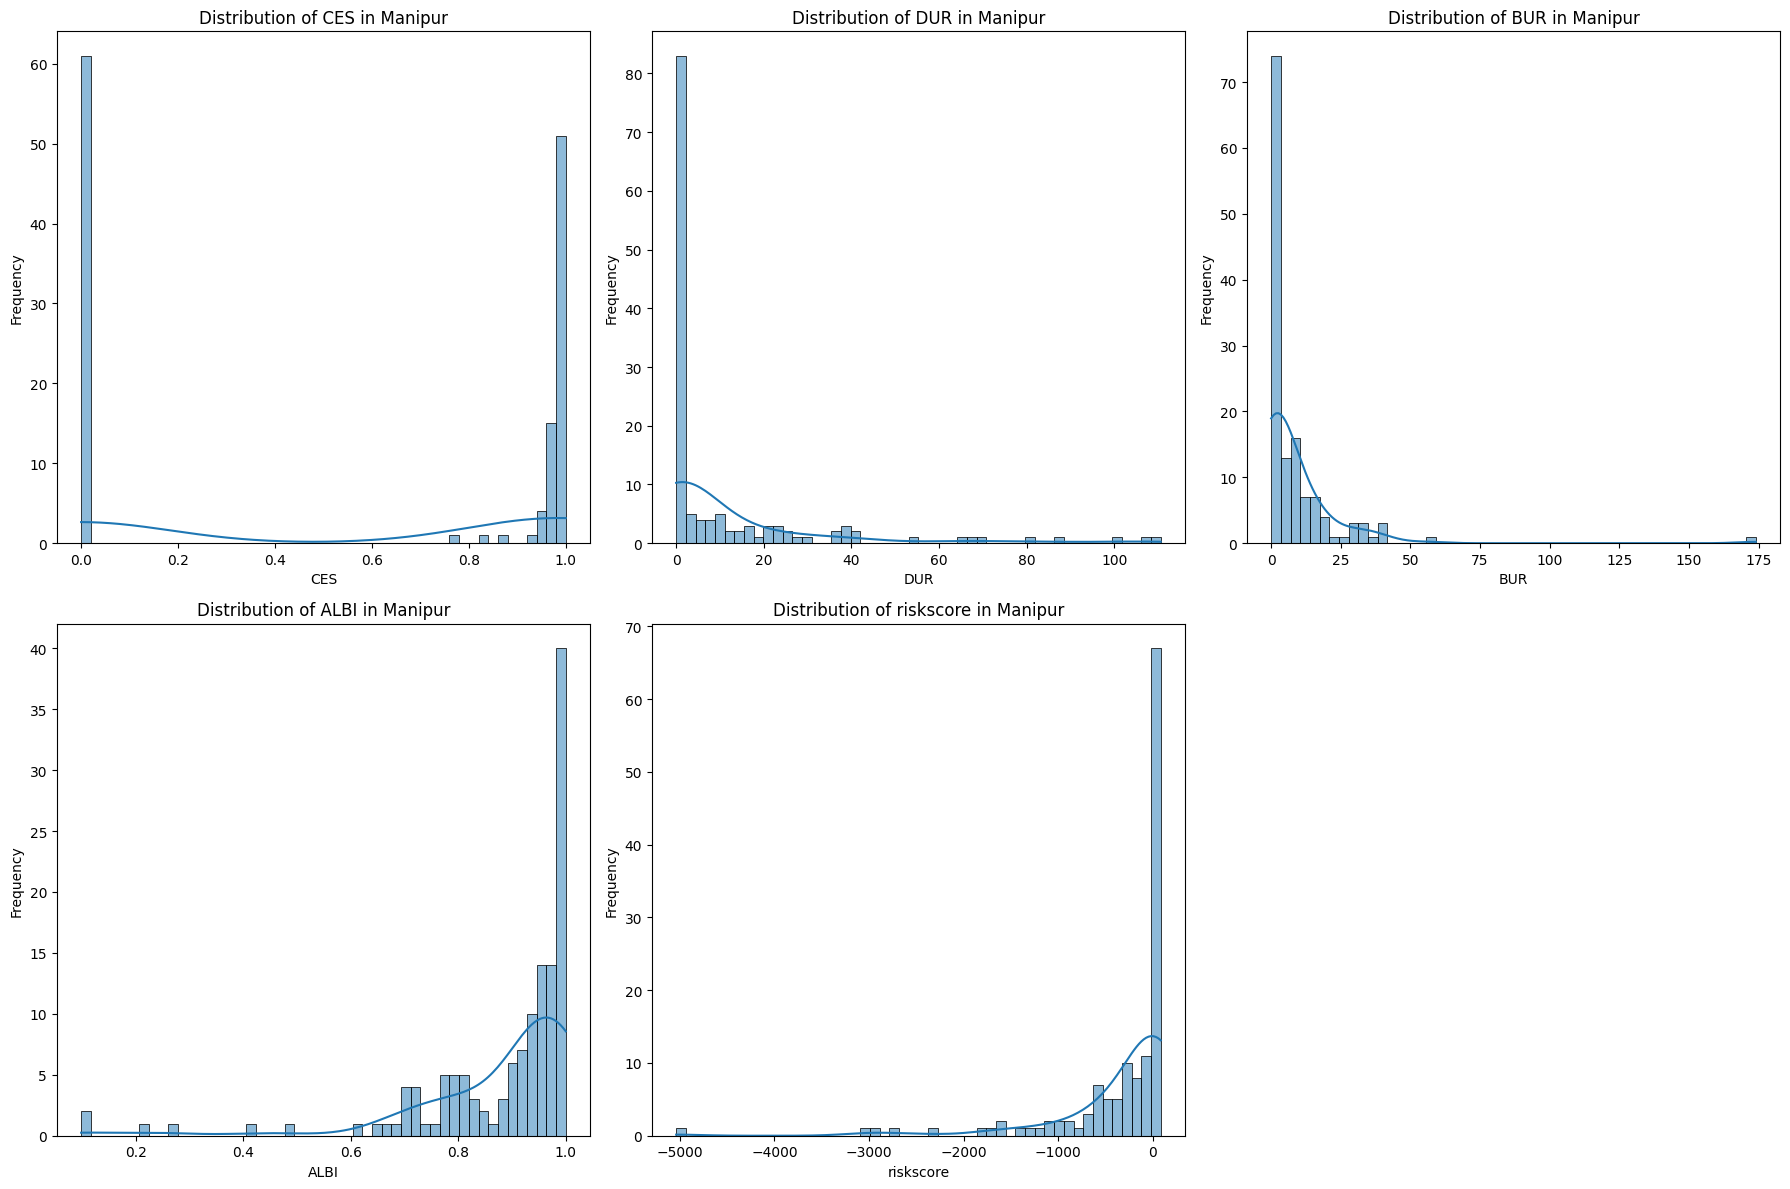

Histograms for CES, DUR, BUR, ALBI, and riskscore displayed for Manipur.


In [403]:
metrics_to_plot = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

plt.figure(figsize=(18, 12))
for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_mn_agg[metric], bins=50, kde=True)
    plt.title(f'Distribution of {metric} in Manipur')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Histograms for CES, DUR, BUR, ALBI, and riskscore displayed for Manipur.")

In [404]:
import pandas as pd

# 1. Find the latest year and month
latest_year = df_mn_agg['year'].max()
latest_month = df_mn_agg[df_mn_agg['year'] == latest_year]['month'].max()

print(f"Latest reporting period: Year {latest_year}, Month {latest_month}")

# 2. Filter df_mn_agg for the latest year and month
df_latest_month = df_mn_agg[(df_mn_agg['year'] == latest_year) & (df_mn_agg['month'] == latest_month)].copy()

# Metrics to analyze
metrics = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

# 3. For each metric, print top 10 and bottom 10 districts
for metric in metrics:
    print(f"\n--- Metric: {metric} ---")

    # Top 10 districts
    top_10 = df_latest_month.sort_values(by=metric, ascending=False).head(10)
    print(f"\nTop 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(top_10[['district', metric]].to_string(index=False))

    # Bottom 10 districts
    bottom_10 = df_latest_month.sort_values(by=metric, ascending=True).head(10)
    print(f"\nBottom 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(bottom_10[['district', metric]].to_string(index=False))

Latest reporting period: Year 2026, Month 1

--- Metric: CES ---

Top 10 Districts by CES (Year 2026, Month 1):
   district      CES
    Chandel 1.000000
Imphal East 1.000000
    Jiribam 1.000000
Imphal West 1.000000
    Thoubal 1.000000
 Tamenglong 1.000000
   Kakching 1.000000
   Senapati 1.000000
     Ukhrul 1.000000
  Bishnupur 0.978261

Bottom 10 Districts by CES (Year 2026, Month 1):
     district      CES
     Pherzawl 0.000000
Churachandpur 0.949153
    Bishnupur 0.978261
      Chandel 1.000000
  Imphal East 1.000000
  Imphal West 1.000000
      Jiribam 1.000000
     Kakching 1.000000
     Senapati 1.000000
   Tamenglong 1.000000

--- Metric: DUR ---

Top 10 Districts by DUR (Year 2026, Month 1):
     district       DUR
      Jiribam 17.500000
      Thoubal 13.449275
  Imphal East  6.969388
  Imphal West  6.462500
     Kakching  4.666667
       Ukhrul  4.000000
    Bishnupur  3.913043
     Senapati  1.895833
Churachandpur  1.762712
      Chandel  1.625000

Bottom 10 Districts b

## Summary (Manipur):

The Aadhaar lifecycle analysis for Manipur provides a detailed view of enrolment and update activities across its districts. The `df_mn_agg` dataset, aggregated by month and district, forms the foundation for evaluating key performance indicators.

### Key Observations:

1.  **Data Integration and Preprocessing**: Initial datasets for enrolment, demographic updates, and biometric updates were successfully loaded, their 'date' columns converted to datetime objects, and merged into a single `df_mn_merged` DataFrame. Missing numerical values resulting from the outer merge were imputed with 0.

2.  **Derived Metrics**: Essential metrics such as `totalenrolments`, `childenrolments`, `totaldemoupdates`, and `totalbioupdates` were calculated. From these, `CES` (Child Enrolment Score), `DUR` (Demographic Update Rate), and `BUR` (Biometric Update Rate) were computed, with appropriate handling for division by zero.

3.  **Normalization and ALBI**: Min-max normalization was applied to `totalenrolments`, `totaldemoupdates`, and `totalbioupdates` to create `Enorm`, `Dnorm`, and `Bnorm`. These normalized values were used to compute `stdnorm` and the `ALBI` (Aadhaar Lifecycle Balance Index), which reflects the balance between enrolment and update activities. ALBI values were clipped between 0 and 1.

4.  **Risk Score**: A `riskscore` was calculated by combining risk-normalized versions of the key metrics, scaled from 0 to 100. Similar to other states analyzed, some negative risk scores were observed, indicating a potential issue with the metric's definition or calculation that needs further review to ensure interpretability and actionability.

5.  **Monthly Trends**: Time-series plots for total enrolments, demographic updates, and biometric updates highlighted monthly fluctuations, suggesting periods of varying activity levels or specific campaigns/reporting cycles.

6.  **Correlation Analysis**: The correlation matrix for age-related columns revealed strong positive correlations within enrolment age groups (`age_0_5` and `age_5_17`), and similarly within demographic (`demo_age_5_17` and `demo_age_17_`) and biometric (`bio_age_5_17` and `bio_age_17_`) update categories. Correlations between enrolment figures and update figures were generally weaker.

7.  **District Performance (Latest Reporting Period: Year 2026, Month 1)**:
    *   **CES (Child Enrolment Score)**: Several districts (Chandel, Imphal East, Jiribam, Imphal West, Thoubal, Tamenglong, Kakching, Senapati, Ukhrul) achieved a perfect CES of 1.0. Pherzawl had 0.0 CES, indicating no child enrolments were reported for this district in the latest month. Churachandpur (0.949) and Bishnupur (0.978) had the next lowest scores.
    *   **DUR (Demographic Update Rate)**: Jiribam (17.5) and Thoubal (13.45) showed the highest DUR, suggesting strong demographic update activity relative to enrolments. Pherzawl (0.0) and Tamenglong (0.952) had the lowest DURs.
    *   **BUR (Biometric Update Rate)**: Thoubal (9.07) and Imphal West (7.56) showed the highest BURs. Pherzawl (0.0) and Jiribam (1.0) were among the lowest, indicating less frequent biometric updates relative to enrolments.
    *   **ALBI (Aadhaar Lifecycle Balance Index)**: Pherzawl (1.0) and Jiribam (0.983) exhibited the best balance, close to 1. Thoubal (0.099) and Imphal East (0.099) had the lowest balance.
    *   **Risk Score**: Pherzawl (80.0) and Tamenglong (12.75) showed the highest positive risk scores. Similar to other states, several districts displayed negative risk scores (e.g., Thoubal at -386.49 and Jiribam at -310.06), highlighting the need to re-evaluate this metric's calculation.

### Insights or Next Steps:

*   **Risk Score Refinement**: The persistent issue of negative `riskscore` values across multiple districts highlights a critical need to review and potentially recalculate this metric. A well-defined risk score should ideally be bounded between 0 and 100, providing clear and actionable insights for prioritizing interventions.
*   **Investigate Zero Activity Districts**: Districts like Pherzawl consistently showing 0.0 for CES, DUR, and BUR, yet having a perfect ALBI and positive risk score, warrant further investigation. This discrepancy might suggest periods of inactivity or reporting gaps that need to be understood to ensure comprehensive Aadhaar lifecycle management.
*   **Address Imbalance in ALBI**: For districts with low ALBI values (e.g., Thoubal and Imphal East), strategies should be developed to improve the balance between new enrolments and the necessary demographic and biometric updates. This might include integrated camps or awareness programs emphasizing the importance of lifecycle events.